# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("dataset_cleaning1.csv")

In [3]:
df.columns

Index(['Age Group', 'Sexual Orientation', 'Race', 'Living Situation',
       'Household Composition', 'Religious Preference', 'Veteran Status',
       'Employment Status', 'Number Of Hours Worked Each Week',
       'Education Status', 'Mental Illness', 'Intellectual Disability',
       'Autism Spectrum', 'Other Developmental Disability',
       'Alcohol Related Disorder', 'Drug Substance Disorder',
       'Opioid Related Disorder', 'Mobility Impairment Disorder',
       'Hearing Impairment', 'Visual Impairment', 'Speech Impairment',
       'Hyperlipidemia', 'High Blood Pressure', 'Diabetes', 'Obesity',
       'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
       'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
       'Endocrine Condition', 'Neurological Condition',
       'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
       'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Serious Mental Illness',
     

In [4]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("---------------------------------------------------------------------------------------------------")

Age Group
ADULT    163797
CHILD     42815
Name: Age Group, dtype: int64
---------------------------------------------------------------------------------------------------
Sexual Orientation
STRAIGHT        146694
UNKNOWN          39427
NON STRAIGHT     20491
Name: Sexual Orientation, dtype: int64
---------------------------------------------------------------------------------------------------
Race
WHITE ONLY      98838
BLACK ONLY      52295
OTHER           38321
UNKNOWN RACE    10559
MULTI-RACIAL     6599
Name: Race, dtype: int64
---------------------------------------------------------------------------------------------------
Living Situation
PRIVATE RESIDENCE         161212
OTHER LIVING SITUATION     22327
UNKNOWN                    16531
HOMELESS                    5360
INSTITUTIONAL SETTING       1182
Name: Living Situation, dtype: int64
---------------------------------------------------------------------------------------------------
Household Composition
COHABITATES WITH OTH

NO         167541
UNKNOWN     26190
YES         12881
Name: Criminal Justice Status, dtype: int64
---------------------------------------------------------------------------------------------------
substance related disorder
NO         163185
YES         35616
UNKNOWN      7811
Name: substance related disorder, dtype: int64
---------------------------------------------------------------------------------------------------
Senses related disorder
NO         166162
UNKNOWN     20464
YES         19986
Name: Senses related disorder, dtype: int64
---------------------------------------------------------------------------------------------------
Brain related disorder
NO         162848
YES         27947
UNKNOWN     15817
Name: Brain related disorder, dtype: int64
---------------------------------------------------------------------------------------------------
Non brain related disorder
YES    116364
NO      90248
Name: Non brain related disorder, dtype: int64
------------------------------

# Feature selection

In [5]:
feature_list = ['Smoke(d)', 'Age Group', 'Cannabis use','Living Situation', 'Gender', 'Criminal Justice Status', 'Education Status','Household Composition', 'Non brain related disorder', 'No Chronic Med Condition','Race','Hearing Impairment', 'High Blood Pressure','Liver Disease', 'Mobility Impairment Disorder','Other Developmental Disability','Brain related disorder', 'Senses related disorder','Speech Impairment', 'Visual Impairment', 'Veteran Status','Intellectual Disability', 'Autism Spectrum','Other Chronic Med Condition', 'Sexual Orientation', 'Serious Mental Illness','Pulmonary Asthma', 'Financial aid or insurance', "substance related disorder"]

In [6]:
##function to select features manually by input list in a pandas DataFrame
def select_features(df, feature_list):
    return df[feature_list]

In [7]:
df = select_features(df, feature_list)

In [8]:
df.shape

(206612, 29)

# Preparing the data for machine learning model

### Handling the UNKNOWN values in the target column

In this part of the project the defined target will be the column 'substance related disorder' that combine the information from three other columns : 'Alcohol Related Disorder', 'Drug Substance Disorder', 'Opioid Related Disorder'. In this part of the project it is better to not have "UNKNOWN' values in the target column. So I decided to drop the rows where 'substance related disorder' == 'UNKNOWN'

In [9]:
# Keep the rows with no UNKNOWN attribute in 'susbatnce related disorder'
df = df[df["substance related disorder"] != "UNKNOWN"]

### Encoding the data for machine learning

In [10]:
'Religious Preference', 'Sexual Orientation', 'Race', 'Household Composition', 'Education Status', 'Living Situation', 'Gender', 'Age Group'

('Religious Preference',
 'Sexual Orientation',
 'Race',
 'Household Composition',
 'Education Status',
 'Living Situation',
 'Gender',
 'Age Group')

In [11]:
gender_mapping = {"UNKNOWN": 0, "FEMALE": 1, "MALE": 2, "TRANSGENDER FEMALE": 3, "TRANSGENDER MALE": 4, "NON-BINARY": 5}
sexual_orientation_mapping = {"STRAIGHT": 1, "UNKNOWN": 0, "NON STRAIGHT": 2}
#religious_preference = {"UNKNOWN": 0, "RELIGIOUS": 1, "SPIRITUAL NOT RELIGIOUS": 2, "NOT SPIRITUAL NOT RELIGIOUS": 3}
race = {"UNKNOWN": 0, "WHITE ONLY": 1, "BLACK ONLY": 2, "OTHER":3, "UNKNOWN RACE": 4, "MULTI-RACIAL":5}
household = {"UNKNOWN": 0, "COHABITATES WITH OTHERS": 1, "LIVES ALONE": 2, "NOT APPLICABLE":3, "HOMELESS": 4}
education = {"UNKNOWN": 0, "MIDDLE SCHOOL TO HIGH SCHOOL": 1, "COLLEGE OR GRADUATE DEGREE": 2, "OTHER":3, "PRE-K TO FIFTH GRADE": 4, "NO FORMAL EDUCATION":5}
living_situation = {"UNKNOWN": 0, "PRIVATE RESIDENCE": 1, "OTHER LIVING SITUATION": 2, "HOMELESS":3, "INSTITUTIONAL SETTING": 4}
age = {"ADULT": 0, "CHILD": 1}

In [12]:
df["Gender"] = df["Gender"].map(gender_mapping)
df["Sexual Orientation"] = df["Sexual Orientation"].map(sexual_orientation_mapping)
#df['Religious Preference'] = df['Religious Preference'].map(religious_preference)
df['Race'] = df['Race'].map(race)
df['Household Composition'] = df['Household Composition'].map(household)
df['Education Status'] = df['Education Status'].map(education)
df['Living Situation'] = df['Living Situation'].map(living_situation)
df['Age Group'] = df['Age Group'].map(age)

In [13]:
col_rep = ['Cannabis use', 'Criminal Justice Status', 'Non brain related disorder', 'No Chronic Med Condition','Hearing Impairment', 'High Blood Pressure','Liver Disease', 'Mobility Impairment Disorder','Other Developmental Disability','Brain related disorder', 'Senses related disorder','Speech Impairment', 'Visual Impairment', 'Veteran Status','Intellectual Disability', 'Autism Spectrum','Other Chronic Med Condition','Serious Mental Illness','Pulmonary Asthma', 'Financial aid or insurance', "substance related disorder", "Smoke(d)"]

In [14]:
df[col_rep] = df[col_rep].replace({"NO": 0, "YES": 1, "UNKNOWN": 2})

In [15]:
df.head()

,Smoke(d),Age Group,Cannabis use,Living Situation,Gender,Criminal Justice Status,Education Status,Household Composition,Non brain related disorder,No Chronic Med Condition,...,Visual Impairment,Veteran Status,Intellectual Disability,Autism Spectrum,Other Chronic Med Condition,Sexual Orientation,Serious Mental Illness,Pulmonary Asthma,Financial aid or insurance,substance related disorder
0,0,0,0,1,1,0,2,1,0,1,...,0,0,0,0,0,1,1,0,1,0
1,1,0,0,4,2,1,1,3,1,0,...,0,0,0,0,1,1,1,0,0,1
2,0,0,0,1,2,0,2,2,1,0,...,0,0,0,0,0,1,1,0,1,0
3,0,0,0,1,1,0,1,2,0,1,...,0,0,0,0,0,1,1,0,1,0
4,0,0,0,1,2,0,1,2,1,0,...,0,0,0,0,1,1,1,0,1,1


In [16]:
df.isna().sum()

Smoke(d)                          0
Age Group                         0
Cannabis use                      0
Living Situation                  0
Gender                            0
Criminal Justice Status           0
Education Status                  0
Household Composition             0
Non brain related disorder        0
No Chronic Med Condition          0
Race                              0
Hearing Impairment                0
High Blood Pressure               0
Liver Disease                     0
Mobility Impairment Disorder      0
Other Developmental Disability    0
Brain related disorder            0
Senses related disorder           0
Speech Impairment                 0
Visual Impairment                 0
Veteran Status                    0
Intellectual Disability           0
Autism Spectrum                   0
Other Chronic Med Condition       0
Sexual Orientation                0
Serious Mental Illness            0
Pulmonary Asthma                  0
Financial aid or insurance  

In [17]:
data_encod = df

### Evaluating the balance between 'Yes' and 'No' attributes in target column

In [18]:
category_No = data_encod[data_encod["substance related disorder"] == 0]
category_Yes = data_encod[data_encod["substance related disorder"] == 1]
print(category_No.shape)
print('')
print(category_Yes.shape)

(163185, 29)

(35616, 29)


We can see that there is an imbalance between the 'YES' and 'NO' attributes in this dataset. We need to handle the imbalance. We will fo this after splitting the data in order to protect the test data from leakage

# Splitting test and train

In [19]:
# Split the dataframe bewteen train and test before upsampling on the train

def split_data(data, test_size=0.2, random_state=42):

    data_train, data_test = train_test_split(data, test_size=test_size, random_state=random_state)
    
    return data_train, data_test

data_train, data_test = split_data(data_encod)

In [20]:
# Check the inbalance in the train data
category_0 = data_train[data_train["substance related disorder"] == 0]
category_1 = data_train[data_train["substance related disorder"] == 1]

print(category_0.shape)
print('')
print(category_1.shape)

(130614, 29)

(28426, 29)


In [21]:
# Check the inbalance in the test data
test_0 = data_test[data_test["substance related disorder"] == 0]
test_1 = data_test[data_test["substance related disorder"] == 1]

print(test_0.shape)
print('')
print(test_1.shape)

(32571, 29)

(7190, 29)


# Downsampling on the train data

In [22]:
# downsample the majority class to the size of the positive class using pandas sample method
c1_len = 28426
category_0_down = category_0.sample(c1_len)
print(category_0_down.shape)
print(category_1.shape)

(28426, 29)
(28426, 29)


In [23]:
# Regroup the data together category_0_down and category_1
data_train_down = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
data_train_down = data_train_down .sample(frac=1)
print('shape after downsampling and concatenating the tables: ', data_train_down.shape)

shape after downsampling and concatenating the tables:  (56852, 29)


# Splitting X and y from train and test data

In [24]:

# Splitting the train data

def split_X_y(df, target_col):
    # Split dataframe into X and y
    X_train = df.drop(target_col, axis=1) #predictive variables
    y_train = df[target_col] #predicted varuable

    return X_train, y_train

X_train, y_train = split_X_y(data_train_down, "substance related disorder")
X_test, y_test = split_X_y(data_test, "substance related disorder")


In [25]:
print ('shape of X_train:', X_train.shape)
print ('')
print ('shape of X_test:', X_test.shape)

shape of X_train: (56852, 28)

shape of X_test: (39761, 28)


***************************************************************************************************************************
# Random Forest
****************************

## Reapplying the model using the hyperparameter

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc_ops = {"max_depth":6,
           #"min_samples_leaf":20,
           #"max_features":None, #when we put none it means the forest will choose its own
           #"n_estimators":100, #n of models
           "bootstrap":True, #random replacement 
           "oob_score":True, #out of bag score: use the records not used for model in validation test
           "random_state":42,
           'max_features': 'sqrt',
           'min_samples_leaf': 1,
           'min_samples_split': 2,
           'n_estimators': 50} 

clf = RandomForestClassifier(**rfc_ops)

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(X_train, y_train)
print("train prediction accuracy score: %.2f" %(clf.score(X_train, y_train)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))

train prediction accuracy score: 0.76
test prediction accuracy score: 0.74


,Error_metric,Train,Test
0,Accuracy,0.762805,0.741581
1,Precision,0.744510,0.393789
2,Recall,0.800218,0.795410


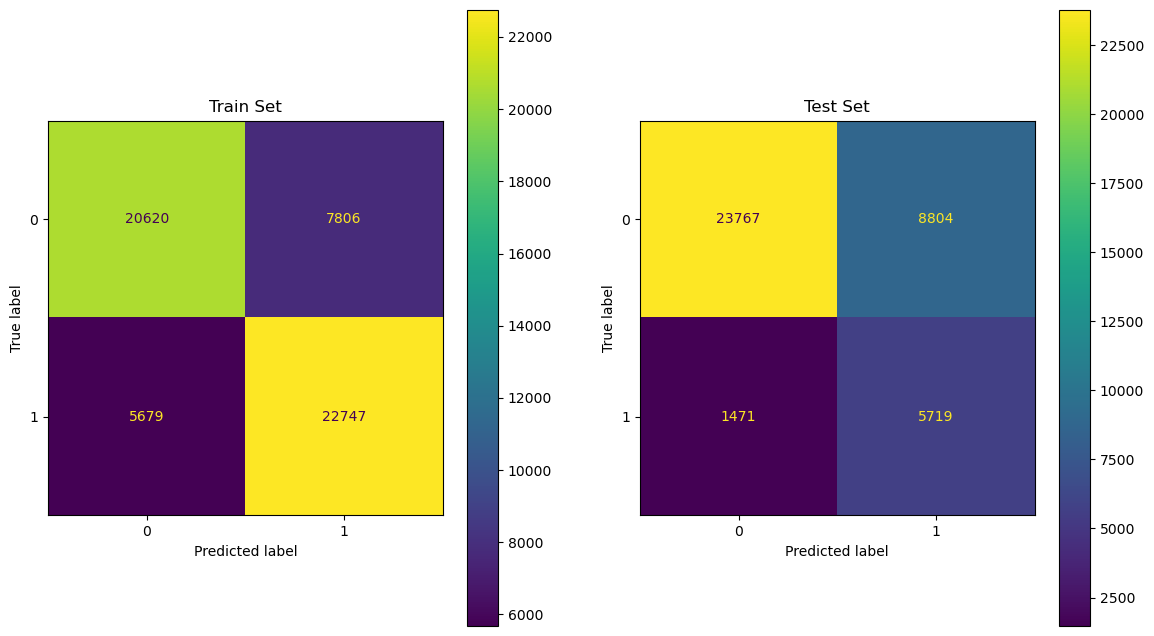

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred_train_dt = clf.predict(X_train)
y_pred_test_dt = clf.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(clf,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(clf,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

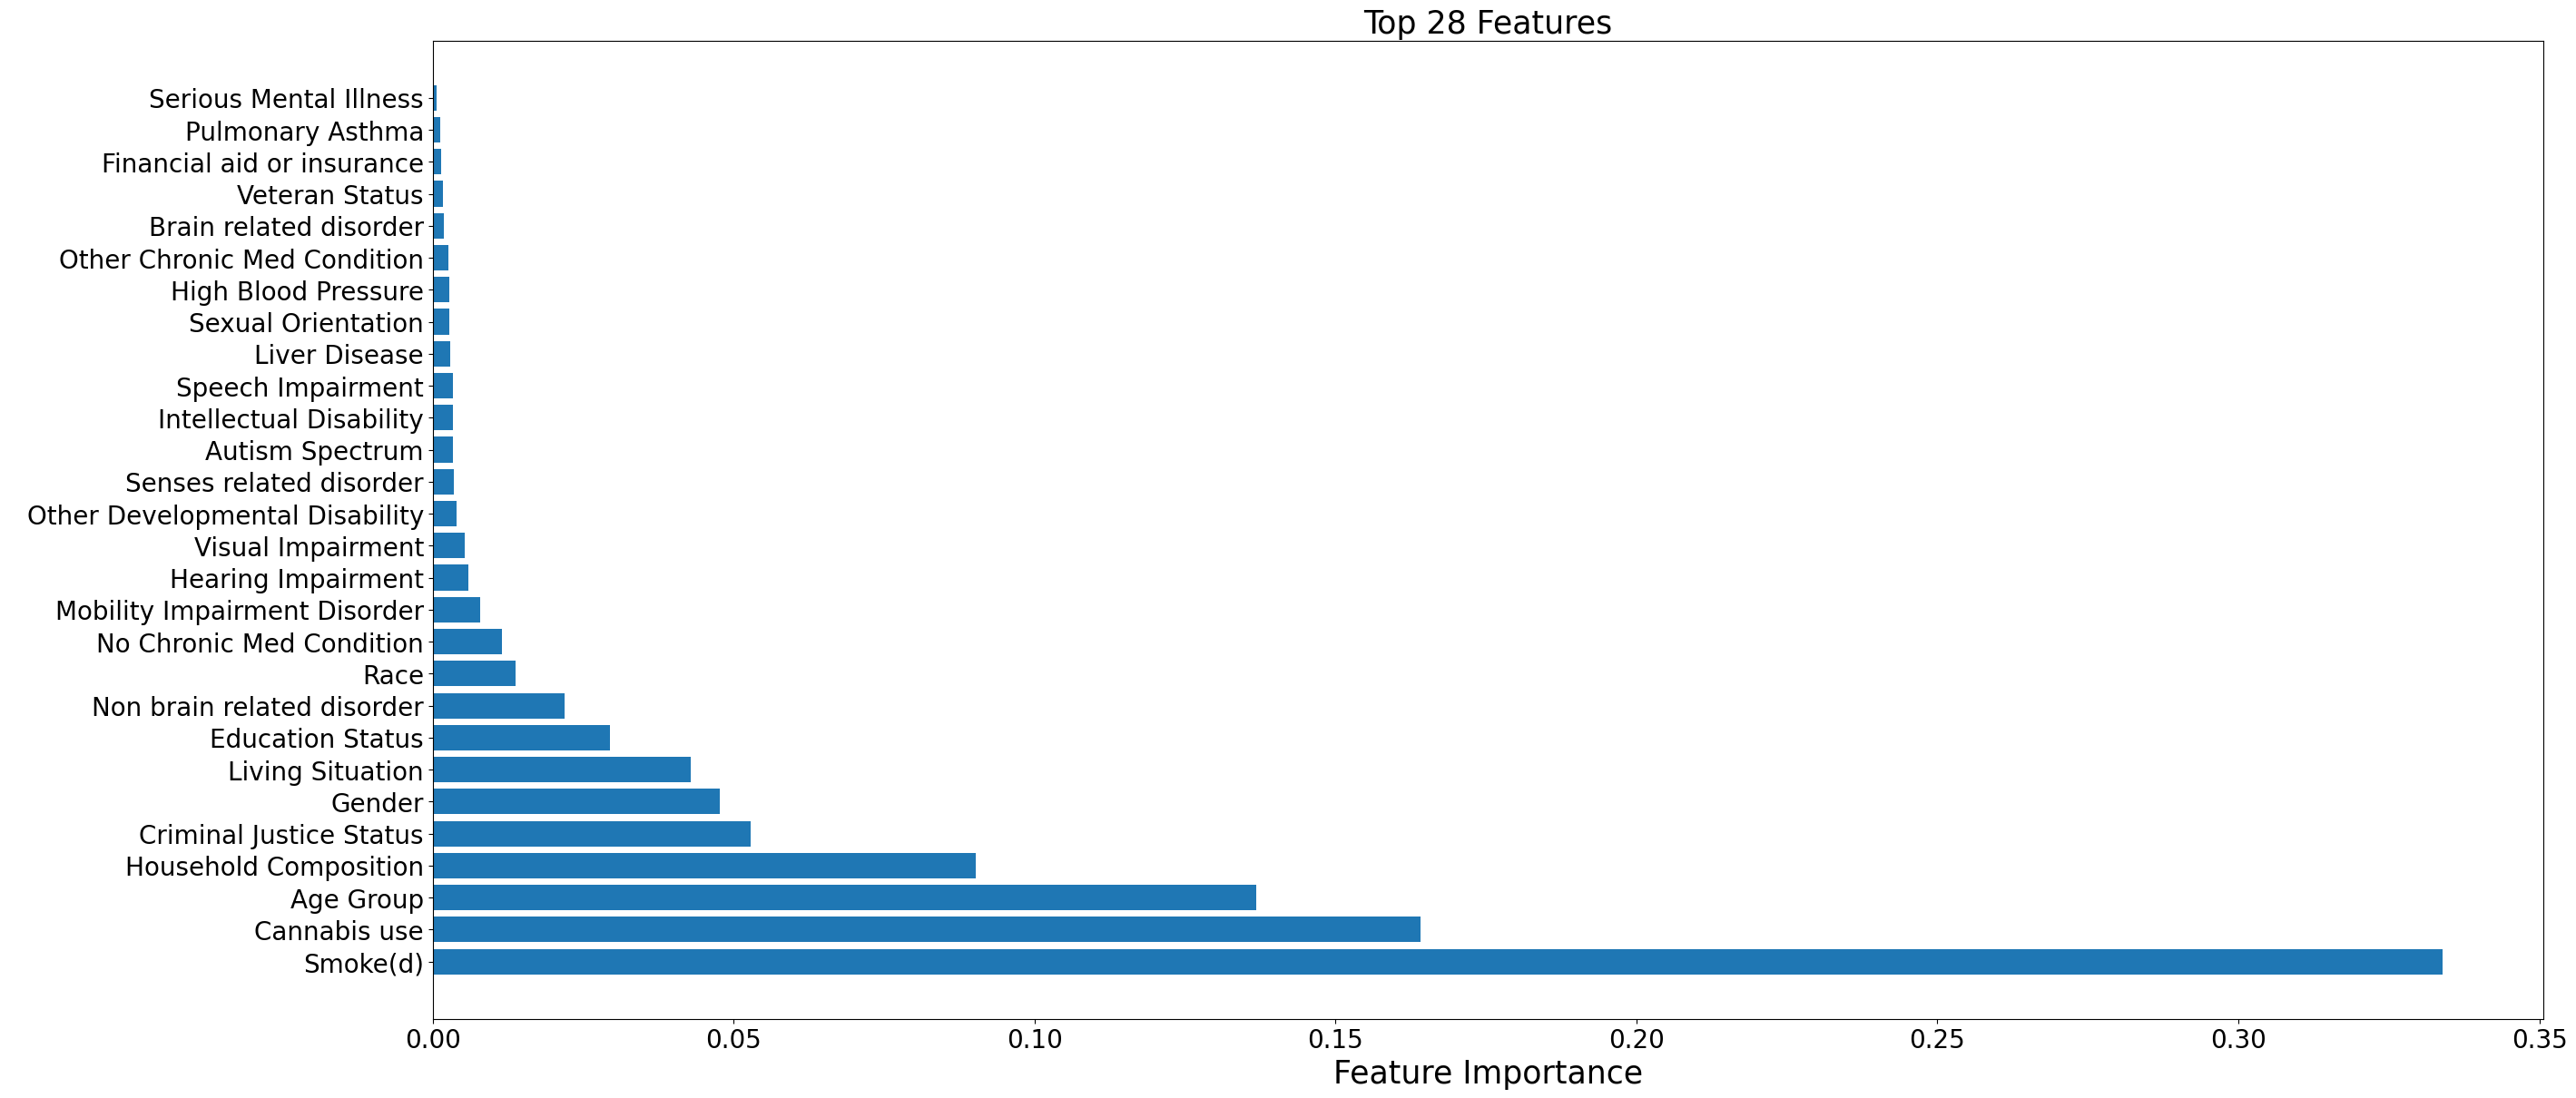

In [28]:
# Sort the features and select only top30
sorted_features = np.argsort(clf.feature_importances_)[::-1]
top30_features = sorted_features[:300]

# Plot horizontal bar chart of top 30 features
plt.figure(figsize=(30, 14))
plt.barh(X_train.columns[top30_features], clf.feature_importances_[top30_features])
plt.xlabel("Feature Importance", fontsize=25)
plt.ylabel(" ")
plt.title("Top 28 Features", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# DEMO TIME!!

### import the patients that we want to test

In [72]:
demo = pd.read_csv('Demo.csv', sep = ";")

In [73]:
demo

,Smoke(d),Age Group,Cannabis use,Living Situation,Gender,Criminal Justice Status,Education Status,Household Composition,Non brain related disorder,No Chronic Med Condition,...,Speech Impairment,Visual Impairment,Veteran Status,Intellectual Disability,Autism Spectrum,Other Chronic Med Condition,Sexual Orientation,Serious Mental Illness,Pulmonary Asthma,Financial aid or insurance
0,NO,ADULT,NO,PRIVATE RESIDENCE,FEMALE,NO,COLLEGE OR GRADUATE DEGREE,COHABITATES WITH OTHERS,YES,YES,...,NO,YES,NO,NO,NO,NO,STRAIGHT,NO,NO,YES
1,NO,ADULT,YES,HOMELESS,MALE,NO,NO FORMAL EDUCATION,HOMELESS,NO,YES,...,NO,YES,NO,NO,NO,NO,NON STRAIGHT,NO,NO,NO


### Encoding the data for machine learning

In [74]:
demo['Gender'] = demo['Gender'].map(gender_mapping)
demo["Sexual Orientation"] = demo["Sexual Orientation"].map(sexual_orientation_mapping)
#df['Religious Preference'] = df['Religious Preference'].map(religious_preference)
demo['Race'] = demo['Race'].map(race)
demo['Household Composition'] = demo['Household Composition'].map(household)
demo['Education Status'] = demo['Education Status'].map(education)
demo['Living Situation'] = demo['Living Situation'].map(living_situation)
demo['Age Group'] = demo['Age Group'].map(age)

In [75]:
col_demo = ['Cannabis use', 'Criminal Justice Status', 'Non brain related disorder', 'No Chronic Med Condition','Hearing Impairment', 'High Blood Pressure','Liver Disease', 'Mobility Impairment Disorder','Other Developmental Disability','Brain related disorder', 'Senses related disorder','Speech Impairment', 'Visual Impairment', 'Veteran Status','Intellectual Disability', 'Autism Spectrum','Other Chronic Med Condition','Serious Mental Illness','Pulmonary Asthma', 'Financial aid or insurance', "Smoke(d)"]

In [76]:
demo[col_demo] = demo[col_demo].replace({"NO": 0, "YES": 1, "UNKNOWN": 2})

In [77]:
demo.isnull().sum()

Smoke(d)                          0
Age Group                         0
Cannabis use                      0
Living Situation                  0
Gender                            0
Criminal Justice Status           0
Education Status                  0
Household Composition             0
Non brain related disorder        0
No Chronic Med Condition          0
Race                              0
Hearing Impairment                0
High Blood Pressure               0
Liver Disease                     0
Mobility Impairment Disorder      0
Other Developmental Disability    0
Brain related disorder            0
Senses related disorder           0
Speech Impairment                 0
Visual Impairment                 0
Veteran Status                    0
Intellectual Disability           0
Autism Spectrum                   0
Other Chronic Med Condition       0
Sexual Orientation                0
Serious Mental Illness            0
Pulmonary Asthma                  0
Financial aid or insurance  

In [78]:
y_pred_demo = clf.predict_proba(demo)

In [79]:
y_pred_demo

array([[0.62220101, 0.37779899],
       [0.39212671, 0.60787329]])